In [1]:
from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import seaborn as sns


RANDOM_STATE = 42

In [2]:
abalone = fetch_ucirepo(id=1) 

X = abalone.data.features 
y = abalone.data.targets

print(abalone.metadata) 
print(abalone.variables) 

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [3]:
data = pd.DataFrame(X)
# data['target'] = y

In [4]:
profile = ProfileReport(data, title='Pandas Profiling Report', explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

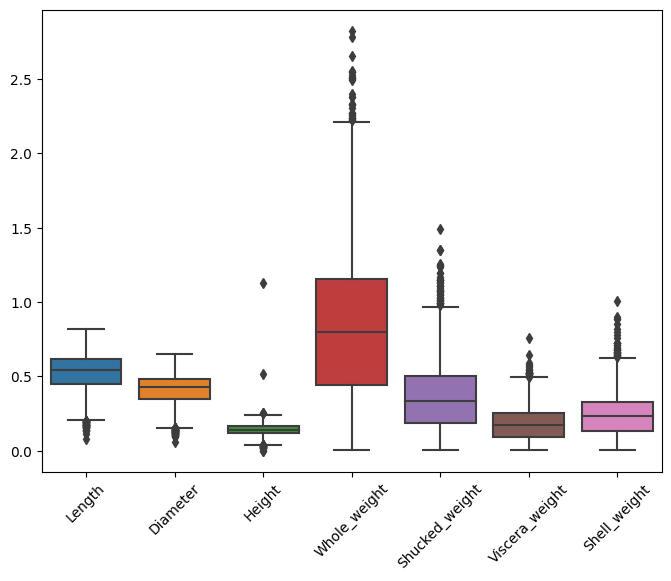

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=data)
plt.xticks(rotation=45)
None 

# EDA for Abalone Clastetring

The dataset is about the physical measurements of abalone. The main goal is to predict the age of abalone from physical measurements determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope. But here we are going to perform clustering on the dataset to see if we can find any patterns in the data.

- 4177 observations
- 8 features
    - 7 continuous features
    - 1 categorical feature SEX M- Man, F- Female, I- Infant
- There are no missing values in the dataset
- The all numerical features are very correlated with each other
- Data will need scaling before applying clustering algorithms
- Data have some outliers but set is small so we can't remove them


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [12]:
categorical_features = ['Sex']
numeric_features = ["Length", "Diameter", "Height", "Whole_weight", "Shucked_weight", "Viscera_weight", "Shell_weight"]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [13]:
X_preprocessed = preprocessor.fit_transform(data)

c:\Users\Konrad\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Text(0.5, 1.0, 'UMAP')

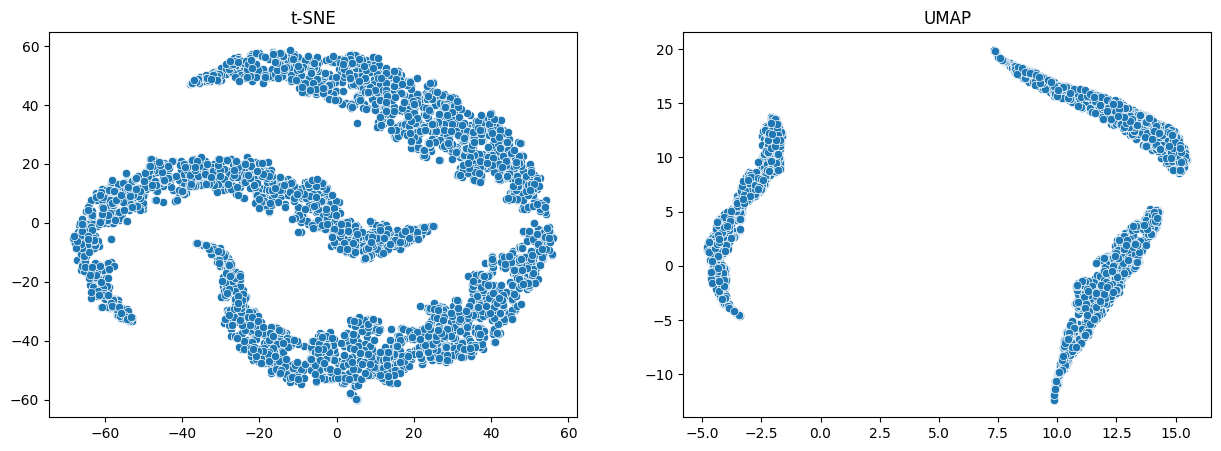

In [26]:
from sklearn.manifold import TSNE
from umap import UMAP

tsne = TSNE(n_components=2, random_state=RANDOM_STATE)
X_tsne = tsne.fit_transform(X_preprocessed)

umap = UMAP(n_components=2, random_state=RANDOM_STATE)
X_umap = umap.fit_transform(X_preprocessed)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], ax=ax[0])
ax[0].set_title("t-SNE")

sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], ax=ax[1])
ax[1].set_title("UMAP")

In [47]:
def evaluate_clustering(X_preprocessed, labels):
    silhouette_score_value = silhouette_score(X_preprocessed, labels)
    calinski_harabasz_score_value = calinski_harabasz_score(X_preprocessed, labels)
    davies_bouldin_score_value = davies_bouldin_score(X_preprocessed, labels)

    print(f"Silhouette Score: {silhouette_score_value}")
    print(f"Calinski Harabasz Score: {calinski_harabasz_score_value}")
    print(f"Davies Bouldin Score: {davies_bouldin_score_value}")

    return silhouette_score_value, calinski_harabasz_score_value, davies_bouldin_score_value

In [48]:
scores = pd.DataFrame(columns=["Silhouette Score", "Calinski Harabasz Score", "Davies Bouldin Score", "Name"])

# KMeans

Silhouette Score: 0.37303677243728667
Calinski Harabasz Score: 5059.0410898582
Davies Bouldin Score: 0.8995474038649368


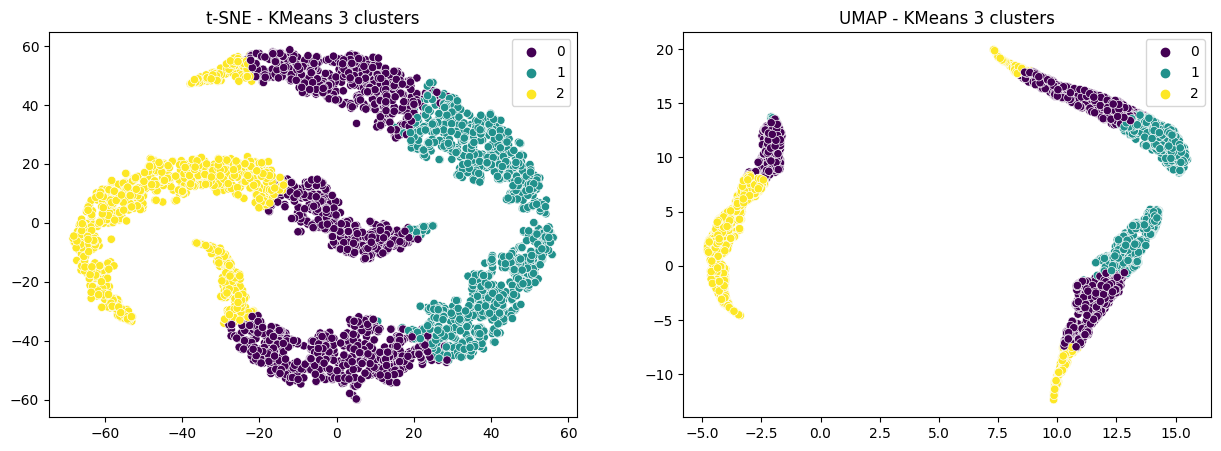

In [49]:
kmeans = KMeans(n_clusters=3, random_state=RANDOM_STATE)

labels_kmeans = kmeans.fit_predict(X_preprocessed)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels_kmeans, ax=ax[0], palette='viridis')
ax[0].set_title("t-SNE - KMeans 3 clusters")

sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=labels_kmeans, ax=ax[1], palette='viridis')
ax[1].set_title("UMAP - KMeans 3 clusters")

scores.loc["KMeans 3 clusters"] = evaluate_clustering(X_preprocessed, labels_kmeans)

Silhouette Score: 0.3151478600719915
Calinski Harabasz Score: 3928.366289455698
Davies Bouldin Score: 1.1462286045551004


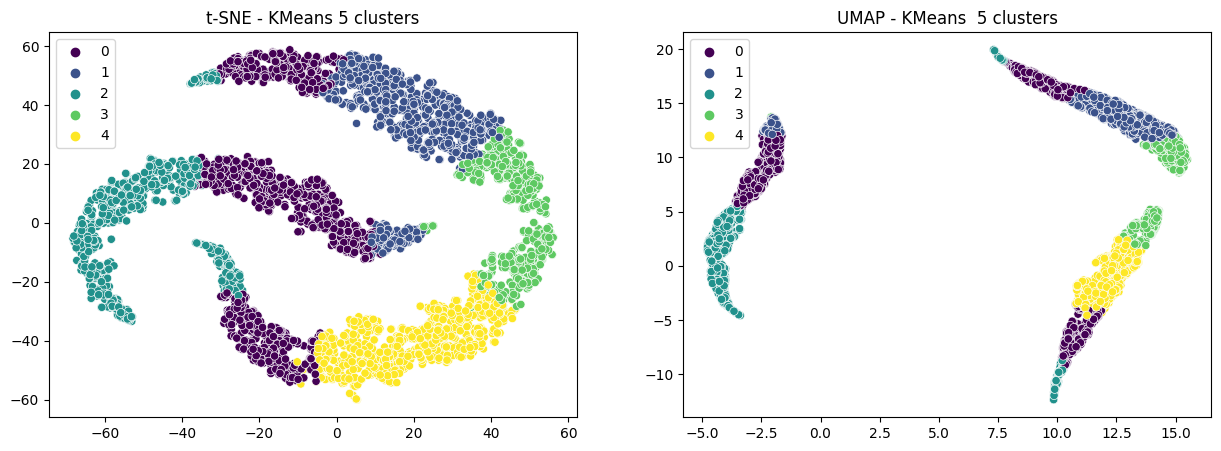

In [51]:
kmeans = KMeans(n_clusters=5, random_state=RANDOM_STATE)

labels_kmeans = kmeans.fit_predict(X_preprocessed)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels_kmeans, ax=ax[0], palette='viridis')
ax[0].set_title("t-SNE - KMeans 5 clusters")

sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=labels_kmeans, ax=ax[1], palette='viridis')
ax[1].set_title("UMAP - KMeans  5 clusters")

scores.loc["KMeans 5 clusters"] = evaluate_clustering(X_preprocessed, labels_kmeans)

Silhouette Score: 0.2987701575886818
Calinski Harabasz Score: 3230.925980919688
Davies Bouldin Score: 0.9597246768339999


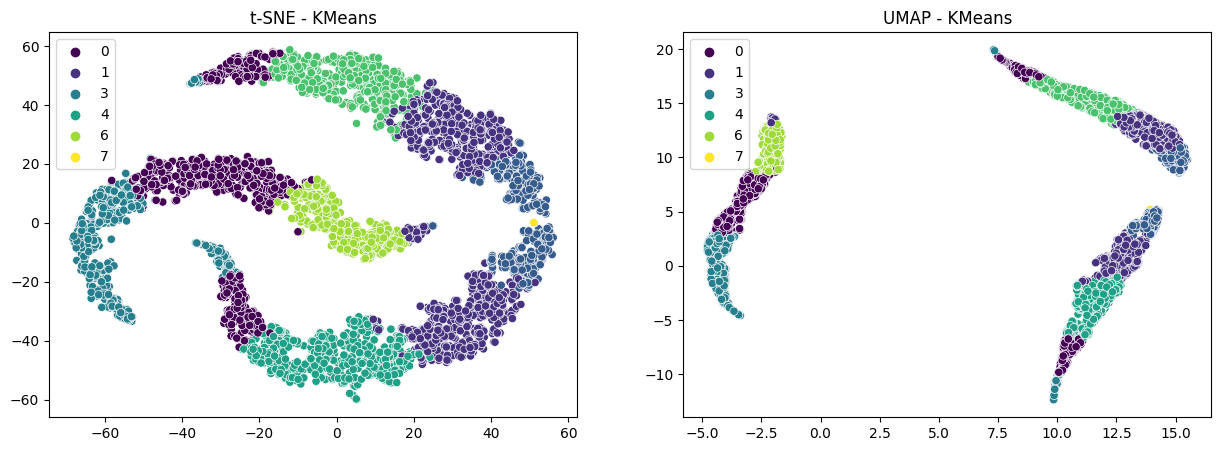

In [52]:
kmeans = KMeans(random_state=RANDOM_STATE)

labels_kmeans = kmeans.fit_predict(X_preprocessed)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels_kmeans, ax=ax[0], palette='viridis')
ax[0].set_title("t-SNE - KMeans")

sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=labels_kmeans, ax=ax[1], palette='viridis')
ax[1].set_title("UMAP - KMeans")

scores.loc["KMeans 8 clusters"] = evaluate_clustering(X_preprocessed, labels_kmeans)

# DBSCAN Clustering

Silhouette Score: -0.08339668152778398
Calinski Harabasz Score: 543.4292443181685
Davies Bouldin Score: 1.8863729867455636


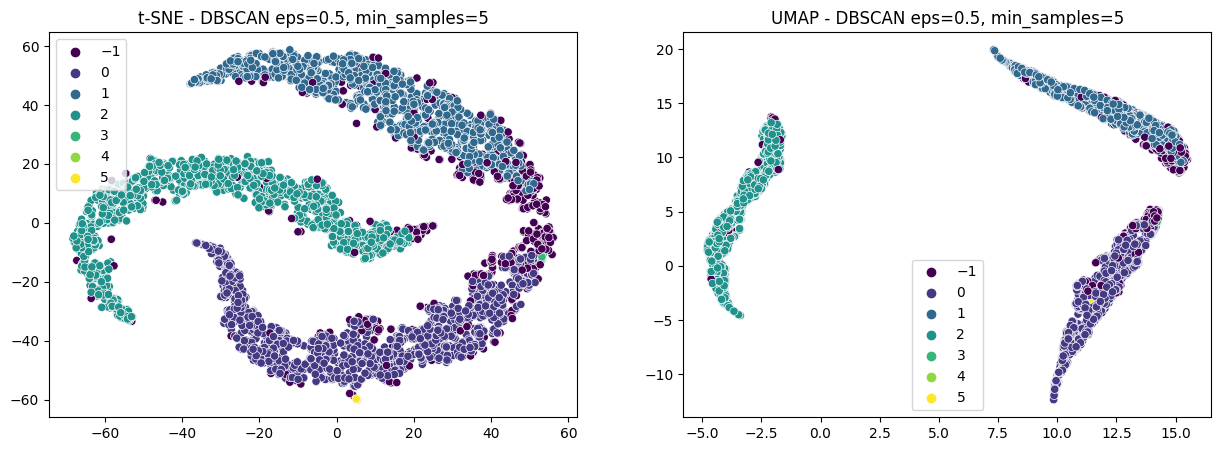

In [53]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

labels_dbscan = dbscan.fit_predict(X_preprocessed)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels_dbscan, ax=ax[0], palette='viridis')
ax[0].set_title("t-SNE - DBSCAN eps=0.5, min_samples=5")

sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=labels_dbscan, ax=ax[1], palette='viridis')
ax[1].set_title("UMAP - DBSCAN eps=0.5, min_samples=5")

scores.loc["DBSCAN eps=0.5, min_samples=5"] = evaluate_clustering(X_preprocessed, labels_dbscan)

Silhouette Score: 0.06434028776628625
Calinski Harabasz Score: 728.2038299305015
Davies Bouldin Score: 1.8955786888944315


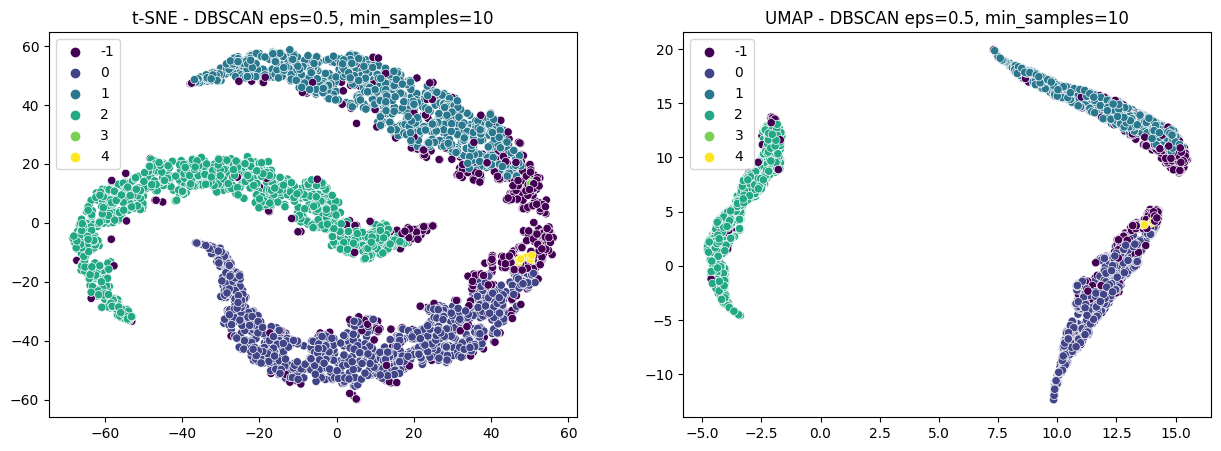

In [54]:
dbscan = DBSCAN(eps=0.5, min_samples=10)

labels_dbscan = dbscan.fit_predict(X_preprocessed)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels_dbscan, ax=ax[0], palette='viridis')
ax[0].set_title("t-SNE - DBSCAN eps=0.5, min_samples=10")

sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=labels_dbscan, ax=ax[1], palette='viridis')
ax[1].set_title("UMAP - DBSCAN eps=0.5, min_samples=10")

scores.loc["DBSCAN eps=0.5, min_samples=10"] = evaluate_clustering(X_preprocessed, labels_dbscan)

Silhouette Score: 0.17447394291431076
Calinski Harabasz Score: 836.9773615686012
Davies Bouldin Score: 2.012649224377779


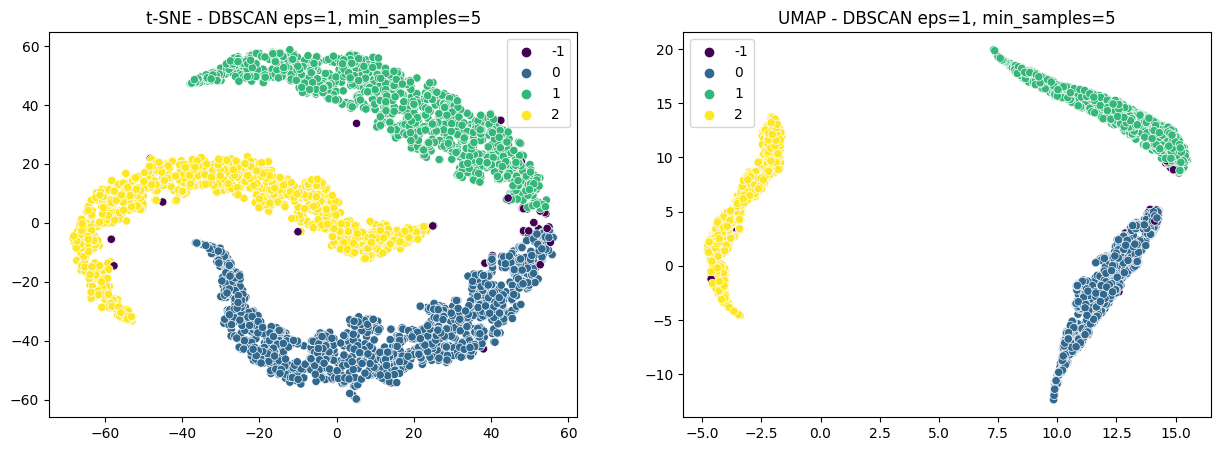

In [55]:
dbscan = DBSCAN(eps=1, min_samples=5)

labels_dbscan = dbscan.fit_predict(X_preprocessed)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels_dbscan, ax=ax[0], palette='viridis')
ax[0].set_title("t-SNE - DBSCAN eps=1, min_samples=5")

sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=labels_dbscan, ax=ax[1], palette='viridis')
ax[1].set_title("UMAP - DBSCAN eps=1, min_samples=5")

scores.loc["DBSCAN eps=1, min_samples=5"] = evaluate_clustering(X_preprocessed, labels_dbscan)

In [56]:
scores

Silhouette Score  Calinski Harabasz Score  \
KMeans 3 clusters                       0.373037              5059.041090   
KMeans 5 clusters                       0.315148              3928.366289   
KMeans 8 clusters                       0.298770              3230.925981   
DBSCAN eps=0.5, min_samples=5          -0.083397               543.429244   
DBSCAN eps=0.5, min_samples=10          0.064340               728.203830   
DBSCAN eps=1, min_samples=5             0.174474               836.977362   

                                Davies Bouldin Score  
KMeans 3 clusters                           0.899547  
KMeans 5 clusters                           1.146229  
KMeans 8 clusters                           0.959725  
DBSCAN eps=0.5, min_samples=5               1.886373  
DBSCAN eps=0.5, min_samples=10              1.895579  
DBSCAN eps=1, min_samples=5                 2.012649

Text(0.5, 1.0, 'UMAP Projection of the Abalone dataset with KMeans labels')

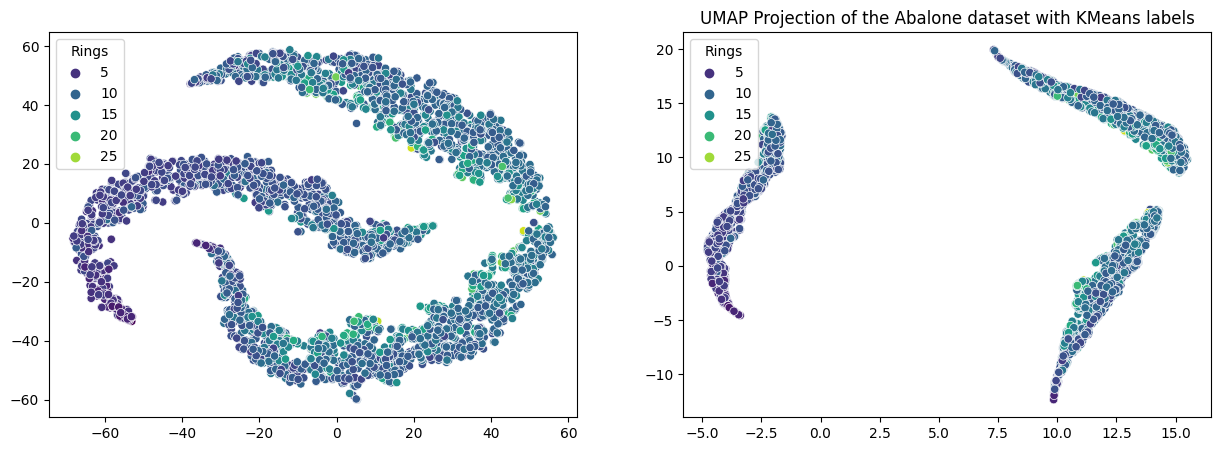

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))


sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y.squeeze(), ax=ax[0], palette='viridis')
plt.title('t-SNE Projection of the Abalone dataset with true labels')

sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y.squeeze(), ax=ax[1], palette='viridis')
plt.title('UMAP Projection of the Abalone dataset with KMeans labels')